In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Preprocessing and visualising training data

In [2]:
df_train = pd.read_csv('train.csv')
df_train

,Sequence,Label
0,AAAFVNQHLCGSHLVEAL,0
1,AAAKEAEAHEEI,1
2,AAALPGQPESPDIPG,1
3,AAALPGQPPDIPG,1
4,AACFKEGSFDEDGFYAKV,0
...,...,...
6389,YYLMDLSYSMKDDLWSI,1
6390,YYRKQLSPLEGGGWLVASG,0
6391,YYSLVTFGQGT,0
6392,YYSTPIEYFNKYSNGNKSVWCQANN,1


In [3]:
df_train.columns

Index(['Sequence', ' Label'], dtype='object')

In [4]:
cols = [i.strip() for i in df_train.columns]
cols

['Sequence', 'Label']

In [5]:
df_train.columns = cols
df_train.columns

Index(['Sequence', 'Label'], dtype='object')

<AxesSubplot:xlabel='Label', ylabel='count'>

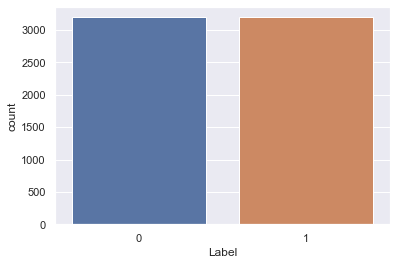

In [13]:
sns.countplot(x = 'Label', data = df_train)

We have equal labels. 0 are not epitopes & 1 are epitopes

In [6]:
#calculating the length of the sequence

def add_length(seq):
    length = len(seq)
    return length

In [7]:
df_train['Length'] = df_train['Sequence'].apply(add_length)
df_train

,Sequence,Label,Length
0,AAAFVNQHLCGSHLVEAL,0,18
1,AAAKEAEAHEEI,1,12
2,AAALPGQPESPDIPG,1,15
3,AAALPGQPPDIPG,1,13
4,AACFKEGSFDEDGFYAKV,0,18
...,...,...,...
6389,YYLMDLSYSMKDDLWSI,1,17
6390,YYRKQLSPLEGGGWLVASG,0,19
6391,YYSLVTFGQGT,0,11
6392,YYSTPIEYFNKYSNGNKSVWCQANN,1,25


<AxesSubplot:xlabel='Label', ylabel='Length'>

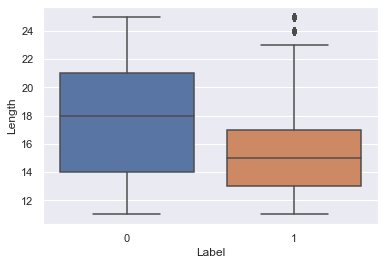

In [22]:
sns.boxplot(x = 'Label', y = 'Length', data = df_train)

In [42]:
df_train['Length'].describe()

count    6394.000000
mean       16.696434
std         3.984480
min        11.000000
25%        14.000000
50%        15.000000
75%        20.000000
max        25.000000
Name: Length, dtype: float64

Non-epitopes have max length between 14 to 21. Epitopes have possible length between 13 to 17. 

In [8]:
#add the count of each letter in the seq

def add_letters_count(dataframe):
    letters = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
    
    for char in letters:
        dataframe[char] = dataframe['Sequence'].str.count(char)
        
    return dataframe

In [9]:
df_train = add_letters_count(df_train)
df_train

,Sequence,Label,Length,A,B,C,D,E,F,G,...,Q,R,S,T,U,V,W,X,Y,Z
0,AAAFVNQHLCGSHLVEAL,0,18,4,0,1,0,1,1,1,...,1,0,1,0,0,2,0,0,0,0
1,AAAKEAEAHEEI,1,12,5,0,0,0,4,0,0,...,0,0,0,0,0,0,0,0,0,0
2,AAALPGQPESPDIPG,1,15,3,0,0,1,1,0,2,...,1,0,1,0,0,0,0,0,0,0
3,AAALPGQPPDIPG,1,13,3,0,0,1,0,0,2,...,1,0,0,0,0,0,0,0,0,0
4,AACFKEGSFDEDGFYAKV,0,18,3,0,1,2,2,3,2,...,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6389,YYLMDLSYSMKDDLWSI,1,17,0,0,0,3,0,0,0,...,0,0,3,0,0,0,1,0,3,0
6390,YYRKQLSPLEGGGWLVASG,0,19,1,0,0,0,1,0,4,...,1,1,2,0,0,1,1,0,2,0
6391,YYSLVTFGQGT,0,11,0,0,0,0,0,1,2,...,1,0,1,2,0,1,0,0,2,0
6392,YYSTPIEYFNKYSNGNKSVWCQANN,1,25,1,0,1,0,1,1,1,...,1,0,3,1,0,1,1,0,4,0


In [37]:
features = df_train.loc[:, 'A':].columns
features

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N',
       'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z'],
      dtype='object')

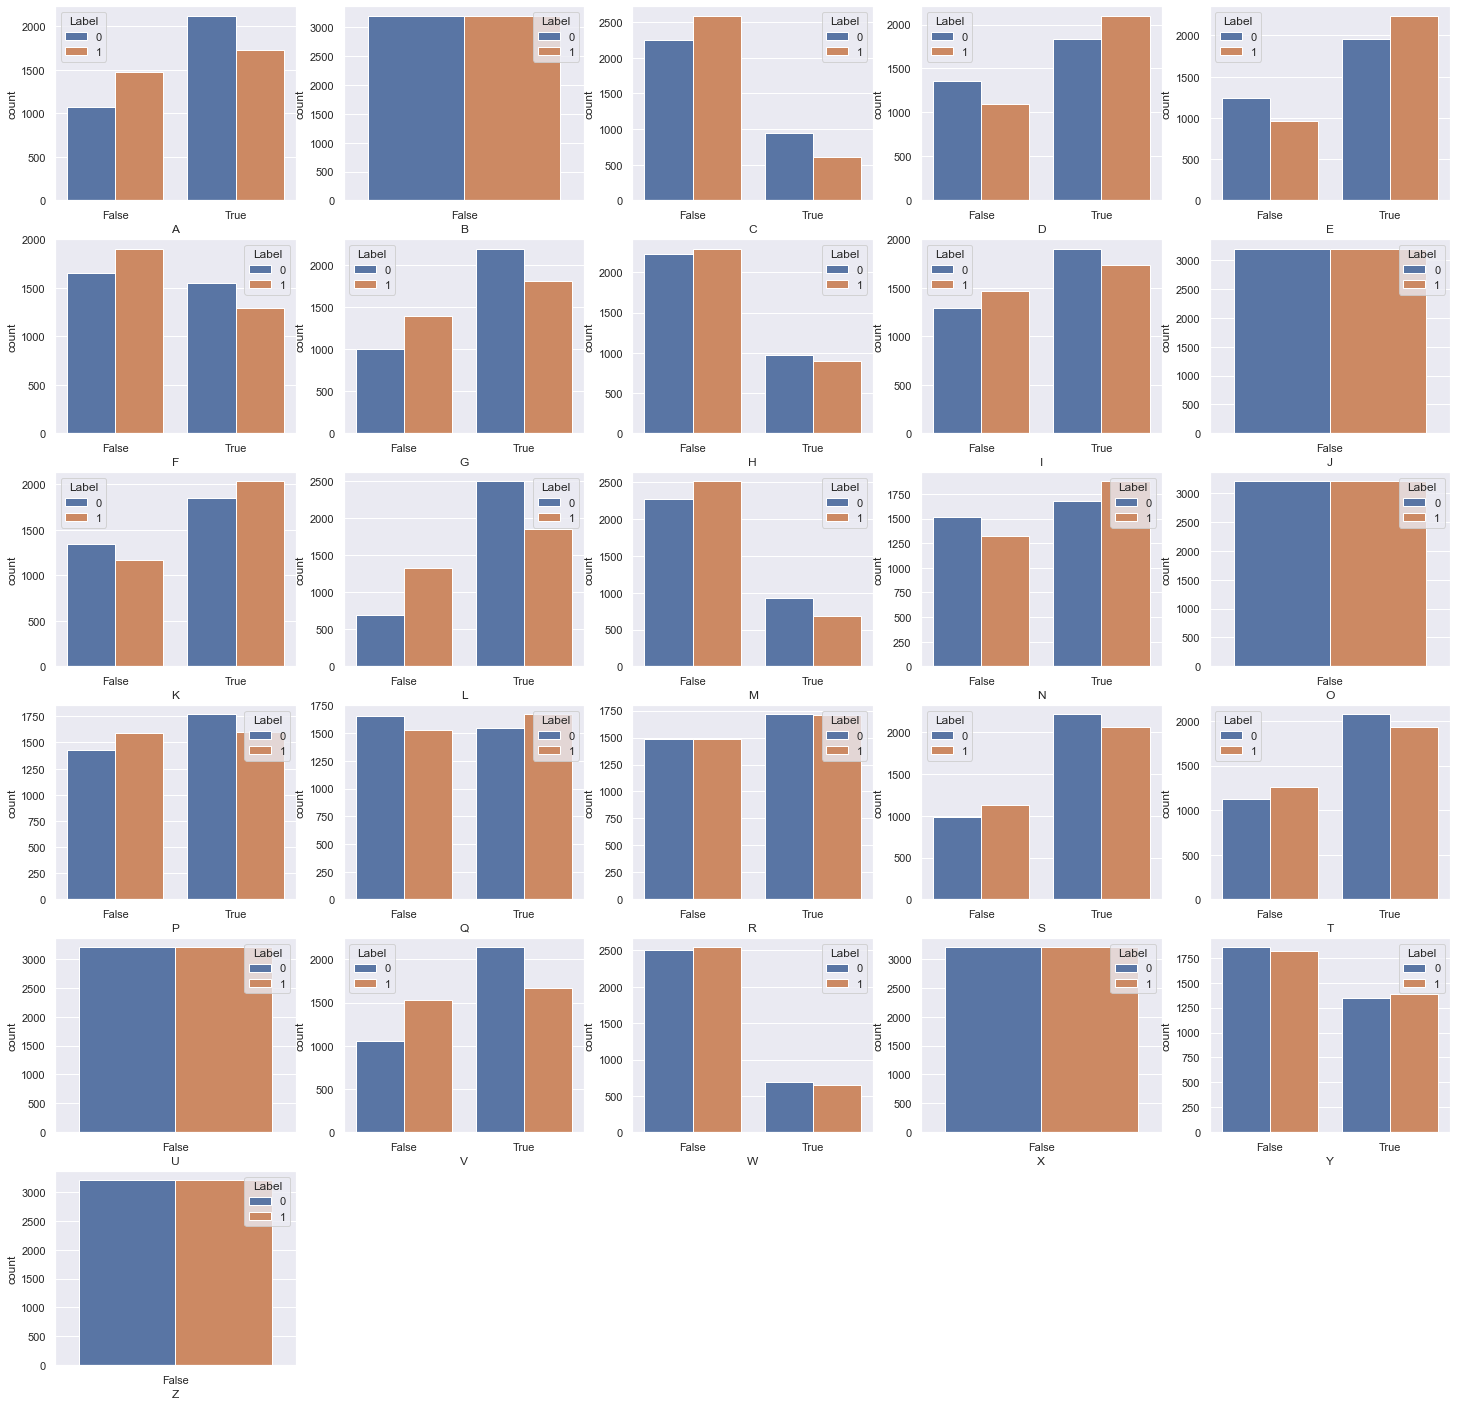

In [41]:
plt.figure(figsize = (25, 25))

for i in range(len(features)):
    plt.subplot(6,5, i+1)
    sns.countplot(x = df_train[features[i]]>0, hue = df_train['Label'])

As we can see that the count of B, J, O, U, X, Z is zero for all sequences so we will drop these columns

In [10]:
df_train.drop(['B', 'J', 'O', 'U', 'X', 'Z'], axis = 1, inplace = True)
df_train.head()

,Sequence,Label,Length,A,C,D,E,F,G,H,...,M,N,P,Q,R,S,T,V,W,Y
0,AAAFVNQHLCGSHLVEAL,0,18,4,1,0,1,1,1,2,...,0,1,0,1,0,1,0,2,0,0
1,AAAKEAEAHEEI,1,12,5,0,0,4,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,AAALPGQPESPDIPG,1,15,3,0,1,1,0,2,0,...,0,0,4,1,0,1,0,0,0,0
3,AAALPGQPPDIPG,1,13,3,0,1,0,0,2,0,...,0,0,4,1,0,0,0,0,0,0
4,AACFKEGSFDEDGFYAKV,0,18,3,1,2,2,3,2,0,...,0,0,0,0,0,1,0,1,0,1


In [17]:
#adding the positional features

def add_pos(dataframe):
    #as the max length of sequence is 25, we will pick 25 features
    for i in range(0, 25):
        dataframe['pos' + str(i)] = 0
     
    #iterate through each sequence
    for i in range(len(dataframe)):
        seq = dataframe['Sequence'][i]
        
        #iterate through each char in a sequence
        for j in range(len(seq)):
            dataframe['pos' + str(j)][i] = ord(seq[j]) - 64
            
        if i%100 == 0:
            print(f'We are at the {i}th row ')
    
    return dataframe
            
        

In [18]:
df_train = add_pos(df_train)


C:\Users\Sahil\AppData\Local\Temp\ipykernel_12572\802179127.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['pos' + str(j)][i] = ord(seq[j]) - 64


We are at the 0th row 
We are at the 100th row 
We are at the 200th row 
We are at the 300th row 
We are at the 400th row 
We are at the 500th row 
We are at the 600th row 
We are at the 700th row 
We are at the 800th row 
We are at the 900th row 
We are at the 1000th row 
We are at the 1100th row 
We are at the 1200th row 
We are at the 1300th row 
We are at the 1400th row 
We are at the 1500th row 
We are at the 1600th row 
We are at the 1700th row 
We are at the 1800th row 
We are at the 1900th row 
We are at the 2000th row 
We are at the 2100th row 
We are at the 2200th row 
We are at the 2300th row 
We are at the 2400th row 
We are at the 2500th row 
We are at the 2600th row 
We are at the 2700th row 
We are at the 2800th row 
We are at the 2900th row 
We are at the 3000th row 
We are at the 3100th row 
We are at the 3200th row 
We are at the 3300th row 
We are at the 3400th row 
We are at the 3500th row 
We are at the 3600th row 
We are at the 3700th row 
We are at the 3800th row

In [19]:
df_train.head()

,Sequence,Label,Length,A,C,D,E,F,G,H,...,pos15,pos16,pos17,pos18,pos19,pos20,pos21,pos22,pos23,pos24
0,AAAFVNQHLCGSHLVEAL,0,18,4,1,0,1,1,1,2,...,5,1,12,0,0,0,0,0,0,0
1,AAAKEAEAHEEI,1,12,5,0,0,4,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,AAALPGQPESPDIPG,1,15,3,0,1,1,0,2,0,...,0,0,0,0,0,0,0,0,0,0
3,AAALPGQPPDIPG,1,13,3,0,1,0,0,2,0,...,0,0,0,0,0,0,0,0,0,0
4,AACFKEGSFDEDGFYAKV,0,18,3,1,2,2,3,2,0,...,1,11,22,0,0,0,0,0,0,0


In [20]:
df_train.to_csv('df_train_preprocessed.csv', index = False)

# Preprocessing testing data

In [22]:
df_test = pd.read_csv('test.csv')
df_test

,ID,Sequence
0,10001,AAAEQLKTTRNAYHQKY
1,10002,AAALAPTQTRAGPHSL
2,10003,AADLALATVNEL
3,10004,AAHPDKRGEDQAEGLPEEVRG
4,10005,AAKPKRAKASKKSTDHPKYS
...,...,...
1593,11594,YVLSSLHIYWGKEDDYGSNH
1594,11595,YVPDDDWFCPNCQ
1595,11596,YYKDKATFGCHDGYS
1596,11597,YYNKVPVEKRVFKNL


In [23]:
df_test.columns

Index(['ID', ' Sequence'], dtype='object')

In [25]:
cols = [i.strip() for i in df_test.columns]
cols

['ID', 'Sequence']

In [27]:
df_test.columns = cols
df_test.columns

Index(['ID', 'Sequence'], dtype='object')

In [28]:
df_test['Length'] = df_test['Sequence'].apply(add_length)
df_test.head()

,ID,Sequence,Length
0,10001,AAAEQLKTTRNAYHQKY,17
1,10002,AAALAPTQTRAGPHSL,16
2,10003,AADLALATVNEL,12
3,10004,AAHPDKRGEDQAEGLPEEVRG,21
4,10005,AAKPKRAKASKKSTDHPKYS,20


In [29]:
df_test = add_letters_count(df_test)
df_test

,ID,Sequence,Length,A,B,C,D,E,F,G,...,Q,R,S,T,U,V,W,X,Y,Z
0,10001,AAAEQLKTTRNAYHQKY,17,4,0,0,0,1,0,0,...,2,1,0,2,0,0,0,0,2,0
1,10002,AAALAPTQTRAGPHSL,16,5,0,0,0,0,0,1,...,1,1,1,2,0,0,0,0,0,0
2,10003,AADLALATVNEL,12,4,0,0,1,1,0,0,...,0,0,0,1,0,1,0,0,0,0
3,10004,AAHPDKRGEDQAEGLPEEVRG,21,3,0,0,2,4,0,3,...,1,2,0,0,0,1,0,0,0,0
4,10005,AAKPKRAKASKKSTDHPKYS,20,4,0,0,1,0,0,0,...,0,1,3,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,11594,YVLSSLHIYWGKEDDYGSNH,20,0,0,0,2,1,0,2,...,0,0,3,0,0,1,1,0,3,0
1594,11595,YVPDDDWFCPNCQ,13,0,0,2,3,0,1,0,...,1,0,0,0,0,1,1,0,1,0
1595,11596,YYKDKATFGCHDGYS,15,1,0,1,2,0,1,2,...,0,0,1,1,0,0,0,0,3,0
1596,11597,YYNKVPVEKRVFKNL,15,0,0,0,0,1,1,0,...,0,1,0,0,0,3,0,0,2,0


In [30]:
df_test.drop(['B', 'J', 'O', 'U', 'X', 'Z'], axis = 1, inplace = True)
df_test.head()

,ID,Sequence,Length,A,C,D,E,F,G,H,...,M,N,P,Q,R,S,T,V,W,Y
0,10001,AAAEQLKTTRNAYHQKY,17,4,0,0,1,0,0,1,...,0,1,0,2,1,0,2,0,0,2
1,10002,AAALAPTQTRAGPHSL,16,5,0,0,0,0,1,1,...,0,0,2,1,1,1,2,0,0,0
2,10003,AADLALATVNEL,12,4,0,1,1,0,0,0,...,0,1,0,0,0,0,1,1,0,0
3,10004,AAHPDKRGEDQAEGLPEEVRG,21,3,0,2,4,0,3,1,...,0,0,2,1,2,0,0,1,0,0
4,10005,AAKPKRAKASKKSTDHPKYS,20,4,0,1,0,0,0,1,...,0,0,2,0,1,3,1,0,0,1


In [31]:
df_test = add_pos(df_test)

C:\Users\Sahil\AppData\Local\Temp\ipykernel_12572\802179127.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe['pos' + str(j)][i] = ord(seq[j]) - 64


We are at the 0th row 
We are at the 100th row 
We are at the 200th row 
We are at the 300th row 
We are at the 400th row 
We are at the 500th row 
We are at the 600th row 
We are at the 700th row 
We are at the 800th row 
We are at the 900th row 
We are at the 1000th row 
We are at the 1100th row 
We are at the 1200th row 
We are at the 1300th row 
We are at the 1400th row 
We are at the 1500th row 


In [32]:
df_test.head()

,ID,Sequence,Length,A,C,D,E,F,G,H,...,pos15,pos16,pos17,pos18,pos19,pos20,pos21,pos22,pos23,pos24
0,10001,AAAEQLKTTRNAYHQKY,17,4,0,0,1,0,0,1,...,11,25,0,0,0,0,0,0,0,0
1,10002,AAALAPTQTRAGPHSL,16,5,0,0,0,0,1,1,...,12,0,0,0,0,0,0,0,0,0
2,10003,AADLALATVNEL,12,4,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,10004,AAHPDKRGEDQAEGLPEEVRG,21,3,0,2,4,0,3,1,...,16,5,5,22,18,7,0,0,0,0
4,10005,AAKPKRAKASKKSTDHPKYS,20,4,0,1,0,0,0,1,...,8,16,11,25,19,0,0,0,0,0


In [33]:
df_test.to_csv('test_preprocessed.csv', index = False)